# This notebook scrapes current data from DAFT.IE on Properties for Rent 

### Scroll down through this code section to reach the report 1, showing average county rental rates

In [88]:
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import pandas as pd
import re

headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.90 Safari/537.36'}

listOfPrices = []
xPlot = []
listOfAverages = []

count = 20
countWeeklyRents=0

pandaListOfCounties = []
pandaListOfPrices = []
listOfHouseTypes = []
listOfAddresses = []
listOfBeds=[]
listOfURLS=[]

def getAverage(listOfPrices):
	averagePrice = sum(listOfPrices) / float(len(listOfPrices))
	averagePrice = round(averagePrice)
	return averagePrice

listOfCounties = ['carlow', 'cavan', 'clare', 'cork', 'donegal', 'galway', 'kerry', 'kildare', 'kilkenny', 'laois', 'leitrim', 'limerick', 'louth', 'mayo', 'meath', 'offaly', 'roscommon', 'sligo', 'tipperary', 'waterford', 'westmeath', 'wexford', 'wicklow']


for place in listOfCounties:

	listOfPrices = []

	for i in range(0,1):	
		#https://www.daft.ie/property-for-rent/sligo/houses?adState=sale-agreed&sort=priceAsc&numBeds_from=3&numBeds_to=3&firstPublishDate_from=now-40d%2Fd
		url = 'https://www.daft.ie/property-for-rent/'+ place + '/?offset='
		#url = 'https://www.daft.ie/property-for-rent/'+ place + '?adState=sale-agreed&firstPublishDate_from=now-40d&offset='
		url = url + str(count)
		count = count + 20
		print("Importing Data....")
		response = requests.get(url, headers=headers)
		c = response.content
		soup = BeautifulSoup(c, features='html.parser')
		#print(soup)
		prices = soup.find_all('span', {'class':'TitleBlock__StyledSpan-sc-1avkvav-5 fKAzIL'})
		houseTypes = soup.find_all('p', {'class': 'TitleBlock__CardInfoItem-sc-1avkvav-9 cKZZql'})
		houseAddress = soup.find_all('p', {'class':'TitleBlock__Address-sc-1avkvav-8 dzihyY'})
		noBeds=soup.find_all('p',{'class': 'TitleBlock__CardInfoItem-sc-1avkvav-9 iLMdur', 'data-testid': 'beds'})
		#houseURL=soup.find_all('a',{'class': 'SearchPage__Result-gg133s-2 djuMQD'})
		#print(noBeds)
		#print(houseURL)
		for price, house, address, beds in zip(prices, houseTypes, houseAddress, noBeds):
			itemPrice = price.get_text()
			itemPrice = itemPrice.replace("€","")
			itemPrice = itemPrice.replace(",","")
			fullstring = itemPrice
			substring = "per week"
			substring2 = "per month"
			if substring in fullstring:
				itemPrice2=1000 #float(itemPrice.replace(" per week",""))*4.3
				countWeeklyRents=countWeeklyRents+1
			elif substring2 in fullstring:
				itemPrice = itemPrice.replace(" per month","")
				itemPrice2=float(itemPrice)
				itemPrice = float(itemPrice2)
				listOfPrices.append(itemPrice)
				#print(itemPrice)               
				pandaListOfCounties.append(place)
				pandaListOfPrices.append(itemPrice)
				newHouse = house.get_text()
				newAddress = address.get_text()
				newBeds= beds.get_text()
				listOfHouseTypes.append(newHouse)
				listOfAddresses.append(newAddress)
				listOfBeds.append(newBeds)
			else:
				itemprice2=0
#			itemPrice = itemPrice.replace(" per week","")     
			#if(itemPrice.isdigit()):
			#newURL= URLS.get_text()
			#listOfURLS.append(newURL)
			#print(newAddress)
			#print(newHouse)
			#print(newBeds)
			#print(itemPrice)
			#print(newURL)            
		if(prices == []):
			break
		#print(listOfPrices)
		#print(url)
	averageStatement = 'The average price of a house in ' + place + ' is €' + str(getAverage(listOfPrices))
	averageHousePrice = getAverage(listOfPrices)
	listOfAverages.append(averageHousePrice)
	count = 0
print("Data Imported!!")

Importing Data....
Importing Data....
Importing Data....
Importing Data....
Importing Data....
Importing Data....
Importing Data....
Importing Data....
Importing Data....
Importing Data....
Importing Data....
Importing Data....
Importing Data....
Importing Data....
Importing Data....
Importing Data....
Importing Data....
Importing Data....
Importing Data....
Importing Data....
Importing Data....
Importing Data....
Importing Data....
Data Imported!!


In [89]:
house_details = {
	'county':pandaListOfCounties,
	'price':pandaListOfPrices,
	'house_type':listOfHouseTypes,
	'house_address':listOfAddresses,
	'beds':listOfBeds
}
print(countWeeklyRents)
print(listOfAverages)

31
[1661, 1169, 1387, 1724, 984, 1701, 1376, 1576, 1094, 1325, 897, 1358, 1281, 982, 1335, 1264, 1010, 932, 1150, 1766, 1228, 1338, 1815]


## 1. Table of Average Rental Prices x County (excluding Dublin)

In [90]:
df = pd.DataFrame(house_details) 
dfAvgs=pd.DataFrame(data=listOfAverages,index=listOfCounties) 
dfAvgs=dfAvgs.sort_values(by=[0], ascending=False) 
display(dfAvgs)

,0
wicklow,1815
waterford,1766
cork,1724
galway,1701
carlow,1661
kildare,1576
clare,1387
kerry,1376
limerick,1358
wexford,1338


## 2. Chart of Average Rents x County (excluding Dublin)

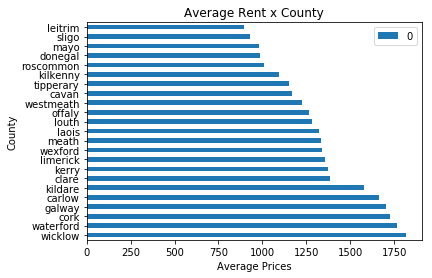

In [91]:
#plt.bar(range(len(data)), sorted(data), color='red', alpha=0.5)
#plt.barh(listOfCounties, listOfAverages)
dfAvgs.plot(kind='barh')
plt.ylabel('County')
plt.title('Average Rent x County')
plt.xlabel('Average Prices')
plt.legend()
plt.show()

## 3. 3-Bedroom Houses in Sligo Mayo Roscommon Leitrim Cavan Donegal

In [92]:
dfhouse=df.query('house_type == "House" and beds=="3 Bed"and price>100 and (county=="sligo" or county=="mayo"or county=="roscommon"or county=="leitrim"or county=="cavan"or county=="donegal")')
display(dfhouse)
print("Count")
print(dfhouse['price'].count())
print("Average")
print(dfhouse['price'].mean())
print("Median")
print(dfhouse['price'].median())

,beds,county,house_address,house_type,price
7,3 Bed,cavan,"3 Claremont Cockhill h12 wa44, Cavan, Co. Cavan",House,2000.0
42,3 Bed,donegal,"33 parkview drive, gortlee, Letterkenny, Co. D...",House,1250.0
43,3 Bed,donegal,"Creesloughbeg, Creeslough, Co. Donegal",House,950.0
44,3 Bed,donegal,"44 Whitethorn Grove, Letterkenny, Co. Donegal",House,1000.0
45,3 Bed,donegal,"Birchill Upper, Creeslough, Co. Donegal",House,800.0
47,3 Bed,donegal,"12 cannon view letterkenhy , Letterkenny, Co. ...",House,900.0
125,3 Bed,leitrim,"main street, Keshcarrigan, Co. Leitrim",House,950.0
128,3 Bed,leitrim,"4, River Meadow, Dromod, Co. Leitrim",House,1000.0
169,3 Bed,mayo,"Belderrig, Ballina, Belderrig, Co. Mayo",House,650.0
172,3 Bed,mayo,"18 Ashwood Glade, Westport, Co. Mayo",House,1150.0


Count
19
Average
1040.7894736842106
Median
1000.0


## 4. 4-Bedroom Houses in Sligo Mayo Roscommon Leitrim Cavan Donegal

In [93]:
dfhouse=df.query('house_type == "House" and beds=="4 Bed"and price>100 and (county=="sligo" or county=="mayo"or county=="roscommon"or county=="leitrim"or county=="cavan"or county=="donegal")')
display(dfhouse)
print("Count")
print(dfhouse['price'].count())
print("Average")
print(dfhouse['price'].mean())
print("Median")
print(dfhouse['price'].median())

,beds,county,house_address,house_type,price
6,4 Bed,cavan,"117 College St, Cavan, Co. Cavan",House,1600.0
37,4 Bed,donegal,"Mountain Top area\nLetterkenny, Letterkenny, C...",House,1250.0
38,4 Bed,donegal,"48 Thornberry, Letterkenny, Co. Donegal",House,1200.0
40,4 Bed,donegal,"The Grange, Glencar, Letterkenny, Co. Donegal",House,1300.0
50,4 Bed,donegal,"Magheraclogher, Derrybeg, Co. Donegal",House,850.0
51,4 Bed,donegal,"94 Ashfield, Letterkenny, Co. Donegal",House,1100.0
52,4 Bed,donegal,"6 Admiran Park, Stranorlar, Co. Donegal",House,950.0
55,4 Bed,donegal,"20 White Maple Avenue, Bundoran, Co. Donegal",House,1200.0
124,4 Bed,leitrim,"Lisnagot, Carrick on Shannon, Carrick-on-Shann...",House,1400.0
166,4 Bed,mayo,"Sarsfield Crescent, Charlestown, Co. Mayo",House,1200.0


Count
13
Average
1230.7692307692307
Median
1200.0


## 5. All Rentals in all Counties (excluding Dublin)

In [94]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 2,
                       ):
    display(df)


,beds,county,house_address,house_type,price
0,4 Bed,carlow,"Apartment 6, Castle St, Carlow Town, Co. Carlow",Apartment,1300.0
1,4 Bed,carlow,"Wolseley park, Tullow, Co. Carlow",House,2000.0
2,5 Bed,carlow,"Court View, Old Dublin Road, Carlow Town, Co. ...",House,2235.0
3,3 Bed,carlow,"Ballynattin, Borris, Co. Carlow",House,1100.0
4,4 Bed,carlow,"Millbrook, Mill Lane, Carlow Town, Co. Carlow",Apartment,1670.0
5,2 Bed,cavan,"12 Diamond Court, Belturbet, Co. Cavan",Apartment,850.0
6,4 Bed,cavan,"117 College St, Cavan, Co. Cavan",House,1600.0
7,3 Bed,cavan,"3 Claremont Cockhill h12 wa44, Cavan, Co. Cavan",House,2000.0
8,2 Bed,cavan,"dowra blacklion, Dowra, Co. Cavan",Apartment,600.0
9,2 Bed,cavan,"Russell Quay, Ballyconnell, Co. Cavan",Apartment,795.0


In [95]:
print("Count")
print(df['price'].count())
print("Average")
print(df['price'].mean())
print("Median")
print(df['price'].median())

Count
283
Average
1350.7279151943462
Median
1200.0


### 6. Export to CSV File

In [96]:
import datetime
dfhouse=df.query('house_type == "House" and (beds=="3 Bed" or beds=="4 Bed")and price>100')
dfhouse.to_csv('3and4Bedcounty_pricesPerMonthNoHolidayRentalsALL' + str(datetime.datetime.now().strftime("%Y_%m_%d-%I:%M")) +'.csv', index=True, encoding='utf-8')
dfhouse=df.query('house_type == "House" and (beds=="3 Bed" or beds=="4 Bed")and price>100 and (county=="sligo" or county=="mayo"or county=="roscommon"or county=="leitrim"or county=="cavan"or county=="donegal")')
dfhouse.to_csv('3and4Bedcounty_pricesPerMonth18NoHolidayRentalsWestAndBorder' + str(datetime.datetime.now().strftime("%Y_%m_%d-%I:%M")) +'.csv', index=True, encoding='utf-8')